# Introduction to Pandas

Pandas is a data analysis and manipulation tool. In meteorology fields, we often see Pandas used to ingest formatted, text-based files, perhaps containing point-based observations. Pandas stores comma-separated-values (CSV) files as a table, or `DataFrame`.

Pandas is built on top of the NumPy package. You can use Pandas in conjunction with matplotlib for plotting, SciPy for statistical analysis, and Scikit-lean for machine learning.


### Goals

- Learn about working with Pandas data structures
- Loading and saving CSV files


### Data structures

Pandas uses two main data structures: 

- `Series` represent column data
- `DataFrames` is a multi-dimensional table and a collection of `Series`

These two data structures behave similarly in that they share many of the same methods.

These data structures interact quite nicely with Python's dictionary data structure. Both provide a collaction of named data -- the keys in dictionaries correspond to column names in Pandas DataFrames, for example.


### Requirements
To use this notebook, you will need to install pandas and matplotlib in your conda environment with the following command:

```
conda install -c anaconda pandas 
conda install -c conda-forge matplotlib
```

### Use cases

- Calculate statistics and answer questions about your data
    - Min, max, mean, median, etc.
    - Correlations between variables
    - Distribution of data
- Clean data -- remove missing values, filter, sort
- Visualize with matplotlib
    - Bar charts, lines, histograms, bubbles
- Store cleaned data into new files



In [1]:
import pandas as pd
import numpy as np

In [2]:
# Let's start with a Python dictionary
# This example shows the snow depth in inches measured at stations 4x daily.

snow_depth = {
    'Denver, CO': [1.2, 4.5, 5, 4.2],
    'Dillon, CO': [4.6, 8.2, 9, 10.5],
    'Vail, CO': [10.0, 12.2, 12.2, 14],
}

In [3]:
snow_depth_df = pd.DataFrame(snow_depth)
snow_depth_df

,"Denver, CO","Dillon, CO","Vail, CO"
0,1.2,4.6,10.0
1,4.5,8.2,12.2
2,5.0,9.0,12.2
3,4.2,10.5,14.0


In [4]:
print(snow_depth_df)

   Denver, CO  Dillon, CO  Vail, CO
0         1.2         4.6      10.0
1         4.5         8.2      12.2
2         5.0         9.0      12.2
3         4.2        10.5      14.0


In [5]:
# The index of each row is an integer by default, but 
# we can set that to a value when we create the dataframe

snow_depth_df = pd.DataFrame(snow_depth, index=[0, 6, 12, 18])
snow_depth_df

,"Denver, CO","Dillon, CO","Vail, CO"
0,1.2,4.6,10.0
6,4.5,8.2,12.2
12,5.0,9.0,12.2
18,4.2,10.5,14.0


In [6]:
type(snow_depth_df)

pandas.core.frame.DataFrame

# Indexing

A full guide can be found here: https://pandas.pydata.org/docs/user_guide/indexing.html


## The basics

The standard list-like way allows interaction with `Series` and `DataFrames` using `[]` notation. You are limited on the inputs, though:

- Series notation: `series[label]` returns the value at that position (row)
- DataFrame notation: `frame[colname]` returns a Series with the column name

A list of column names can also be provided for indexing several columns in a DataFrame


 

In [7]:
denver = snow_depth_df['Denver, CO']
denver

0     1.2
6     4.5
12    5.0
18    4.2
Name: Denver, CO, dtype: float64

In [8]:
type(denver)

pandas.core.series.Series

In [9]:
denver[12]

5.0

In [10]:
# Just the mountain locations
mountains = snow_depth_df[['Dillon, CO', 'Vail, CO']]
mountains

,"Dillon, CO","Vail, CO"
0,4.6,10.0
6,8.2,12.2
12,9.0,12.2
18,10.5,14.0


In [11]:
# Indexing a Series works just like a Python list or Numpy array
denver[:-2]


0    1.2
6    4.5
Name: Denver, CO, dtype: float64

In [12]:
denver[::2]

0     1.2
12    5.0
Name: Denver, CO, dtype: float64

In [13]:
# And reset a value in a Series

denver[6] = 12.5
denver

0      1.2
6     12.5
12     5.0
18     4.2
Name: Denver, CO, dtype: float64

In [14]:
# Remove series items

denver[1] = 55
print(denver)

denver = denver.drop(1)
print(denver)

0      1.2
6     12.5
12     5.0
18     4.2
1     55.0
Name: Denver, CO, dtype: float64
0      1.2
6     12.5
12     5.0
18     4.2
Name: Denver, CO, dtype: float64


## Multi-axis indexing

These are sort of like methods, but are called with square brackets! Eek!


Is done two basic ways:

- `.loc` is a label based way to identify data. You can provide any of these types of input to the method
 - A single label like `'5'` or `'a'`
 - A list or array of labels like `['a', 'b']`
 - A slice of labels `'a':'f'` -- this one is inclusive!!
 - A boolean array
 - A callable function that returns a valid input listed above
 
- `.iloc` is an integer position based way to reference data -- it's still 0 based indexing. Allowed inputs are:
 - An integer like `5`
 - A list or array of integers `[1, 2, 5]`
 - A slice object with ints `1:7`
 - A boolean array
 - A callable function that returns a valid input listed above
   

In [15]:
# An example from the docs:

dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4),
                  index=dates, columns=['A', 'B', 'C', 'D'])

df

,A,B,C,D
2000-01-01,-0.915679,0.504814,0.395555,0.004743
2000-01-02,-1.371338,-1.740632,-0.216900,-0.257044
2000-01-03,0.536637,1.175758,0.510757,-0.286447
2000-01-04,-0.449479,-0.803699,0.677058,0.309823
2000-01-05,-1.471933,-0.360283,0.107574,0.832001
2000-01-06,0.097355,-0.762672,-0.205209,0.132779
2000-01-07,1.681702,0.025231,-0.356144,0.420007
2000-01-08,-1.279898,1.165016,0.575768,0.276231


In [16]:
# Reference a column (or series) in the DataFrame, and save it

s = df['A']
s

2000-01-01   -0.915679
2000-01-02   -1.371338
2000-01-03    0.536637
2000-01-04   -0.449479
2000-01-05   -1.471933
2000-01-06    0.097355
2000-01-07    1.681702
2000-01-08   -1.279898
Freq: D, Name: A, dtype: float64

In [17]:
# A short cut...all the Series in the DataFrame (without spaces) are stored as object attributes
df.A

2000-01-01   -0.915679
2000-01-02   -1.371338
2000-01-03    0.536637
2000-01-04   -0.449479
2000-01-05   -1.471933
2000-01-06    0.097355
2000-01-07    1.681702
2000-01-08   -1.279898
Freq: D, Name: A, dtype: float64

In [18]:
df

,A,B,C,D
2000-01-01,-0.915679,0.504814,0.395555,0.004743
2000-01-02,-1.371338,-1.740632,-0.216900,-0.257044
2000-01-03,0.536637,1.175758,0.510757,-0.286447
2000-01-04,-0.449479,-0.803699,0.677058,0.309823
2000-01-05,-1.471933,-0.360283,0.107574,0.832001
2000-01-06,0.097355,-0.762672,-0.205209,0.132779
2000-01-07,1.681702,0.025231,-0.356144,0.420007
2000-01-08,-1.279898,1.165016,0.575768,0.276231


In [19]:
# Reference the 5th row
df.A.iloc[5]

0.09735454682463543

In [20]:
# Reference a range of rows
df.C.iloc[5:]

2000-01-06   -0.205209
2000-01-07   -0.356144
2000-01-08    0.575768
Freq: D, Name: C, dtype: float64

In [21]:
# Reference the data for the Jan 3
values = df.loc['2000-01-03']
values

A    0.536637
B    1.175758
C    0.510757
D   -0.286447
Name: 2000-01-03 00:00:00, dtype: float64

In [22]:
# Reference a given value with a comma-separated list...in row, column order
df.loc['2000-01-03', 'B']

1.1757576668032106

In [23]:
df

,A,B,C,D
2000-01-01,-0.915679,0.504814,0.395555,0.004743
2000-01-02,-1.371338,-1.740632,-0.216900,-0.257044
2000-01-03,0.536637,1.175758,0.510757,-0.286447
2000-01-04,-0.449479,-0.803699,0.677058,0.309823
2000-01-05,-1.471933,-0.360283,0.107574,0.832001
2000-01-06,0.097355,-0.762672,-0.205209,0.132779
2000-01-07,1.681702,0.025231,-0.356144,0.420007
2000-01-08,-1.279898,1.165016,0.575768,0.276231


In [24]:
# Reference several days -- every other day 
# Here's a really nice guide to working with datetime indices:
#      https://www.sergilehkyi.com/tips-on-working-with-datetime-index-in-pandas/
df.A.loc['January 3, 2000':'January 8, 2000':2]

2000-01-03    0.536637
2000-01-05   -1.471933
2000-01-07    1.681702
Freq: 2D, Name: A, dtype: float64

In [25]:
# With attribute notation
df.A.iloc[2]


0.5366370025900242

In [26]:
# With index notation
df.loc[df.index[[2]], 'A']

2000-01-03    0.536637
Name: A, dtype: float64

In [27]:
# To return just the value with loc and iloc
df.iloc[2].loc['A']

0.5366370025900242

In [28]:
# Print out the columns object
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

In [29]:
# Print the indices
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')

In [30]:
# We have now transformed a ROW into a Series object...it's not just columns!
type(values)

pandas.core.series.Series

In [31]:
# Turn the series back into a row like it was before with a transpose 
# Transpose changes order of the row/column just like in numpy!
# Try it without the transpose (.T)

val_df = pd.DataFrame(values).T
val_df

,A,B,C,D
2000-01-03,0.536637,1.175758,0.510757,-0.286447


## Loading real data

Let's look at some penguin data!

Clone a popular data set repository. Use this command in your terminal.

```
git clone https://github.com/mwaskom/seaborn-data
```

Then copy the penguins.csv file to the same folder as this notebook.

In [32]:
penguin_df = pd.read_csv('penguins.csv')
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [33]:
# Look at the first few rows
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [34]:
# Or the last few
penguin_df.tail(12)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE


In [35]:
# First stop...info about the data
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [36]:
# Then describe the data
penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [37]:
# A bit more info
penguin_df.shape


(344, 7)

In [38]:
# Cleaning -- dropping duplicates
penguin_df.drop_duplicates(inplace=True)

In [39]:
penguin_df.shape

(344, 7)

In [40]:
penguin_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [41]:
# Rename columns
penguin_df.rename(columns={
    'bill_length_mm': 'bill length (mm)',
    'flipper_length_mm': 'flipper length (mm)'
}, inplace=True)
penguin_df

,species,island,bill length (mm),bill_depth_mm,flipper length (mm),body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [42]:
penguin_df.columns = [col.replace('(mm)', 'mm') for col in penguin_df]
penguin_df.columns = [col.replace(' ', '_') for col in penguin_df]
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [43]:
# Remove null values -- removes any row containing a NaN
# Use inplace=True to update inplace
# Use axis=1 to drop axes with NaN values
penguin_df.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [44]:
# Check whether variables are correlated
# 1 means they are perfectly correlated, 
#    positive means one goes up with other, negative means one decreases as the other increases
penguin_df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [45]:
# Extract columns
bill_data = penguin_df[['bill_length_mm', 'bill_depth_mm']]
bill_data

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,NaN,NaN
4,36.7,19.3
...,...,...
339,NaN,NaN
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [46]:
# Extract a row -- this DataFrame has numerical indices so iloc and loc work the same
penguin_df.loc[333]

species              Gentoo
island               Biscoe
bill_length_mm         51.5
bill_depth_mm          16.3
flipper_length_mm       230
body_mass_g            5500
sex                    MALE
Name: 333, dtype: object

In [47]:
penguin_df.iloc[333]

species              Gentoo
island               Biscoe
bill_length_mm         51.5
bill_depth_mm          16.3
flipper_length_mm       230
body_mass_g            5500
sex                    MALE
Name: 333, dtype: object

In [48]:
# Extract all entries will bills longer than 40 mm
penguin_df[penguin_df.bill_length_mm > 40]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,MALE
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [49]:
# Now the females with bills longer than 40 mm
long_billed_females = penguin_df[(penguin_df.bill_length_mm > 40) & (penguin_df.sex == "FEMALE")]
long_billed_females

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
27,Adelie,Biscoe,40.5,17.9,187.0,3200.0,FEMALE
37,Adelie,Dream,42.2,18.5,180.0,3550.0,FEMALE
76,Adelie,Torgersen,40.9,16.8,191.0,3700.0,FEMALE
...,...,...,...,...,...,...,...
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE


In [50]:
# Save the dataframe to a new data file
long_billed_females.to_csv('long_billed_females.csv')

In [51]:
# Make a plot of the data
import matplotlib.pyplot as plt

# set font and plot size to be larger
plt.rcParams.update({'font.size': 18, 'figure.figsize': (10, 8)}) 


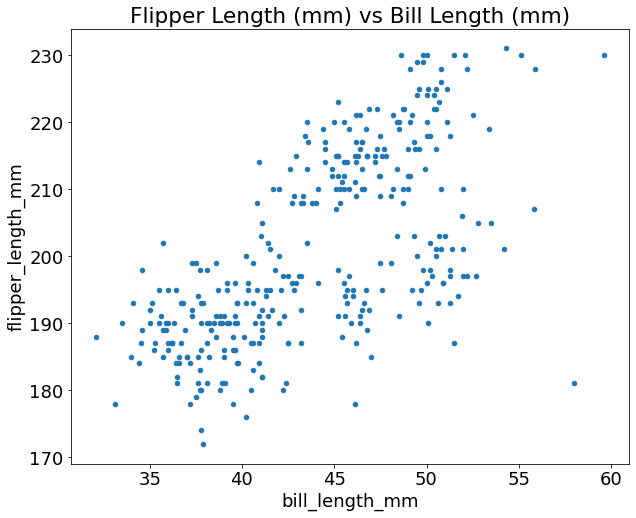

In [52]:
penguin_df.plot(kind='scatter', x='bill_length_mm', y='flipper_length_mm', title='Flipper Length (mm) vs Bill Length (mm)')



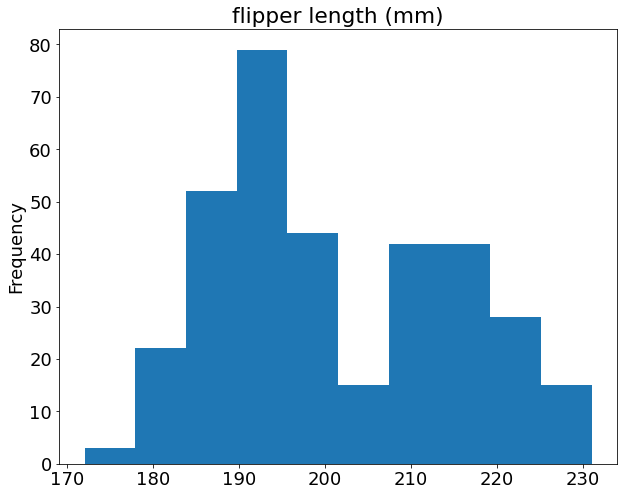

In [53]:
penguin_df['flipper_length_mm'].plot(kind='hist', title='flipper length (mm)')


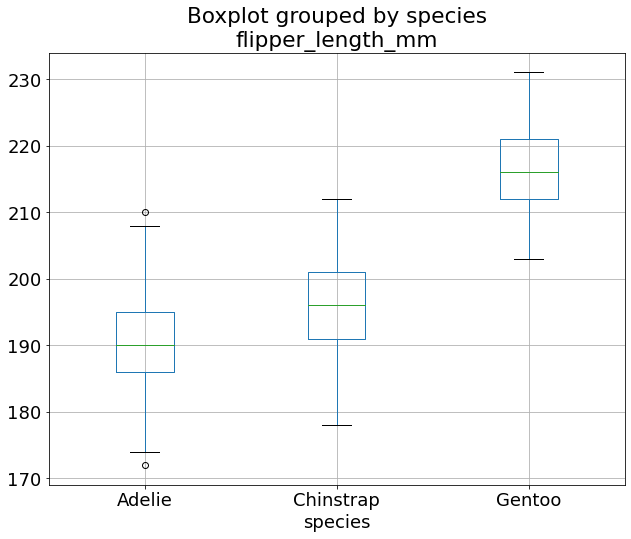

In [54]:
penguin_df.boxplot(column='flipper_length_mm', by='species')
